<a href="https://colab.research.google.com/github/putrinahampun/StartupCampusJourney/blob/main/Assignments/05_01_Fire_Putri_Yanti_Nahampun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Ch. 5 - Computer Vision [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence Track`
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PREREQUISITE` All modules (with their suitable versions) are installed properly.
<br>`TASK` Complete the notebook cell's code marked with <b>#TODO</b> comment.
<br>`TARGET PORTFOLIO` Students are able to replicate the image enhancement algorithm commonly (and recently) used in smartphone companies.
<br>`WARNING` Do **NOT CHANGE** any codes within the User-defined Functions (UDFs) section.

### Case Study Description
As of July 2023, both Apple and Samsung lead the smartphone industry worldwide, with a combined 52.61% of the total market share [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). As the main feature that must be present on today's smartphones, Apple and Samsung are competing to create camera technology so you can capture your best photo even in the low light condition.
- In September 2019, Apple introduced **Deep Fusion** technology (via the iPhone 11 series) to tackle the challenge. Its upgrade, named **Photonic Engine**, was introduced in September 2022 via the new iPhone 14 series [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- In February 2023, Samsung introduced **Adaptive Tetra-squared Pixel Sensor** technology with the Samsung S23 series as a counter-solution to a similar problem, promising excellent bright photo results from dark-toned images [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

At its core, both technologies work by combining several adjacent pixels into a single pixel, using a **Max Pooling** operation. In this case, you are challenged to replicate the concept (brighten dark-toned photos), and then compare the result with another approach, i.e., **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

[KLIK UNTUK TERJEMAHKAN TEKS](https://translate.google.com/?hl=id&ie=UTF-8&sl=en&tl=id&text=As%20of%20July%202023%2C%20both%20Apple%20and%20Samsung%20lead%20the%20smartphone%20industry%20worldwide%2C%20with%20a%20combined%2052.61%25%20of%20the%20total%20market%20share%20(ref1).%20As%20the%20main%20feature%20that%20must%20be%20present%20on%20today%27s%20smartphones%2C%20Apple%20and%20Samsung%20are%20competing%20to%20create%20camera%20technology%20so%20you%20can%20capture%20your%20best%20photo%20even%20in%20the%20low%20light%20condition.%0A%0A-%20In%20September%202019%2C%20Apple%20introduced%20Deep%20Fusion%20technology%20(via%20the%20iPhone%2011%20series)%20to%20tackle%20the%20challenge.%20Its%20upgrade%2C%20named%20Photonic%20Engine%2C%20was%20introduced%20in%20September%202022%20via%20the%20new%20iPhone%2014%20series%20(ref2).%0A%0A-%20In%20February%202023%2C%20Samsung%20introduced%20Adaptive%20Tetra-squared%20Pixel%20Sensor%20technology%20with%20the%20Samsung%20S23%20series%20as%20a%20counter-solution%20to%20a%20similar%20problem%2C%20promising%20excellent%20bright%20photo%20results%20from%20dark-toned%20images%20(ref3).%0A%0AAt%20its%20core%2C%20both%20technologies%20work%20by%20combining%20several%20adjacent%20pixels%20into%20a%20single%20pixel%2C%20using%20a%20Max%20Pooling%20operation.%20In%20this%20case%2C%20you%20are%20challenged%20to%20replicate%20the%20concept%20(brighten%20dark-toned%20photos)%2C%20and%20then%20compare%20the%20result%20with%20another%20approach%2C%20i.e.%2C%20Contrast%20Limited%20Adaptive%20Histogram%20Equation%20(CLAHE).&op=translate)

### Import libraries

In [1]:
import numpy as np, cv2
from skimage.io import imsave #saving the image file
from skimage.measure import block_reduce #reduce the resolution of an image by grouping pixels
from torch.nn import MaxPool2d #for maxpooling layer
from torch import from_numpy #convert numpy array into pytorch tensor.
from matplotlib import pyplot as plt
from matplotlib.image import imread #to read an image from a file.

### User-defined Functions (UDFs)

In [2]:
def plot(
    imgs : list, #variable imgs contains the image used in this code, the type of the parameter is "list"
    titles : list = ["ORIGINAL", "EDITED"], #original and edited as the label of the image, so it means that there are 2 image, the type of the parameter is "list"
    figsize : tuple = (8, 5), #To set the figure (graph) that present your images
    cmaps : list = [None, None], #To set the color of value that will be used when present images or graph, default used None
    *args, **kwargs #this function can accept additional arguments
) -> None: #it means return None

    # To prevent if the number of images > 3
    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    # To prevent if the number of images != the number of titles
    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    # To present the figure (graph)
    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    # subplot identifiers when creating a multi-subplot figure using matplotlib
    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    # show the plot
    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [3]:
# CLAHE : image processing technique used to enhance the contrast of an image.

def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    # convert to LAB color model, it will be more easy to do processing tasks in images using LAB color space compared to BGR
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))

    # apply CLAHE for lightness (L) component only
    # cliplimit => to control the contrast enhancement of image
    # tilegridsize => the size of the grid in which contrast enhancement is performed
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light)

    # return with reconvert to BGR color model
    # after enhance the contrast of light, then merge the LAB color space with a and b
    # then, reconvert the image that we've enhanced to be BGR
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR)

### Load dataset
Do NOT forget to upload "photo1.jpeg" and "lena.png" to the Google Collab files.

In [5]:
# imread => the function to reads an image into an array (pixels)
# imread function from matpltlib library
img = imread("photo1.jpeg")

In [6]:
# imread function => to reads an image into an array (pixels)
# imread function from cv2 library
lena = cv2.imread("lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

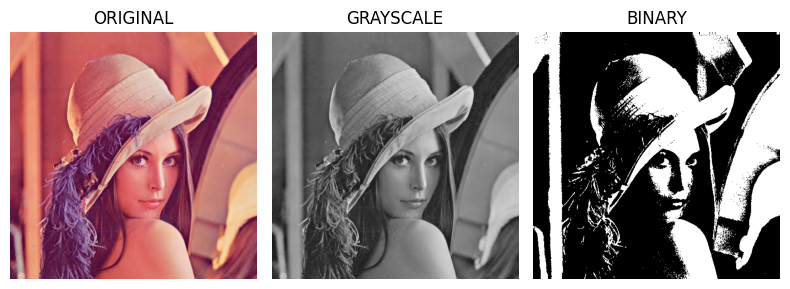

In [7]:
# we change BGR to RGB because matplotlib library expects images in RGB
# open cv give BGR format
# the difference is the order of the color channel

# original image
img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # TODO: Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB

# color image to grayscaled image
img_grayscaled =  cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)# TODO: Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
img_grayscaled = cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 128, 255, cv2.THRESH_BINARY) # TODO: Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY

# plot both
plot(imgs=[img_lena, img_grayscaled, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, None, "gray"])

* Check their histograms

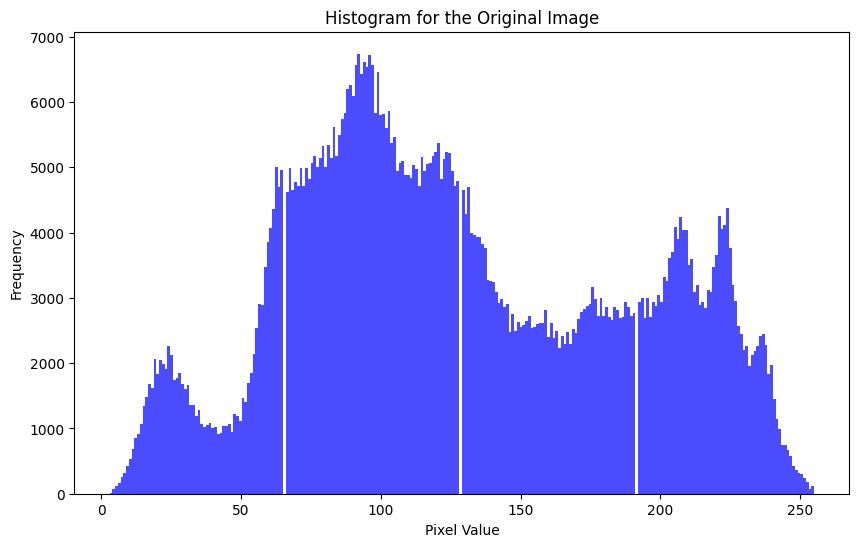

In [8]:
# TODO: Plot the histogram from the original image
plt.figure(figsize=(10, 6))
plt.hist(img_lena.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogram for the Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

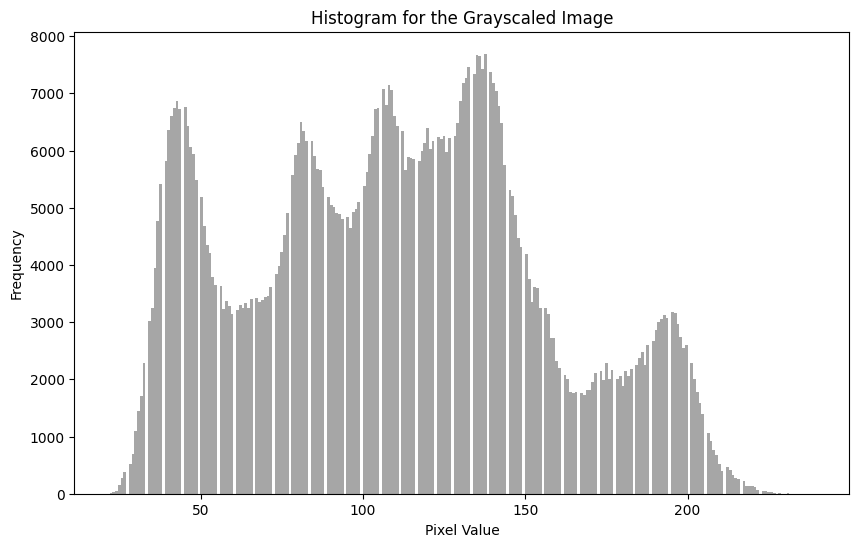

In [9]:
# TODO: Plot the histogram from the grayscaled image
plt.figure(figsize=(10, 6))
plt.hist(img_grayscaled.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram for the Grayscaled Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

### Max Pooling (using Scikit-image)

In [10]:
BLOCK_SIZE = (4, 4, 1)

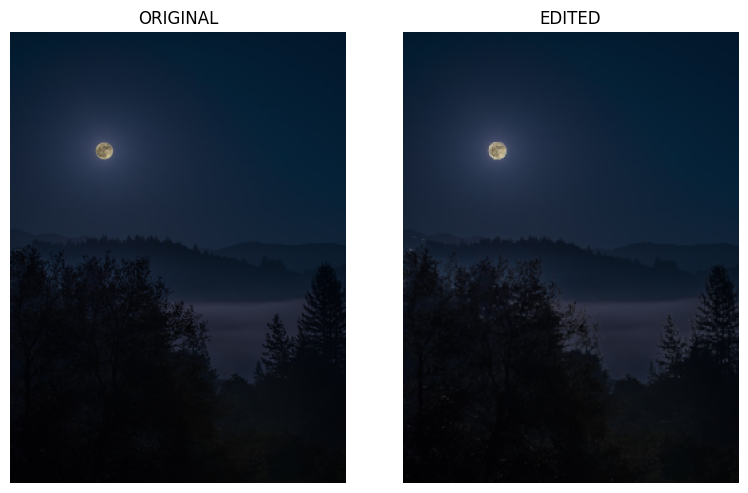

In [11]:
# Reduction Operation => the image will be divided in some blocks
                        # the reduction within each block
                        # this operation will be take the maximum value of all pixels in each blocks.

# block_size => the size of block, in this case used (4,4,1) means the size is 4x4 pixels and 1 as the grayscale.
# func = np.ax => to get the maximum pixel of each pixels

img_edited = block_reduce(img, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img, img_edited])

### Max Pooling (using PyTorch)

<ipython-input-12-c9e6b4653ea4>:5: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_torch = from_numpy(img).permute(2, 0, 1).float()


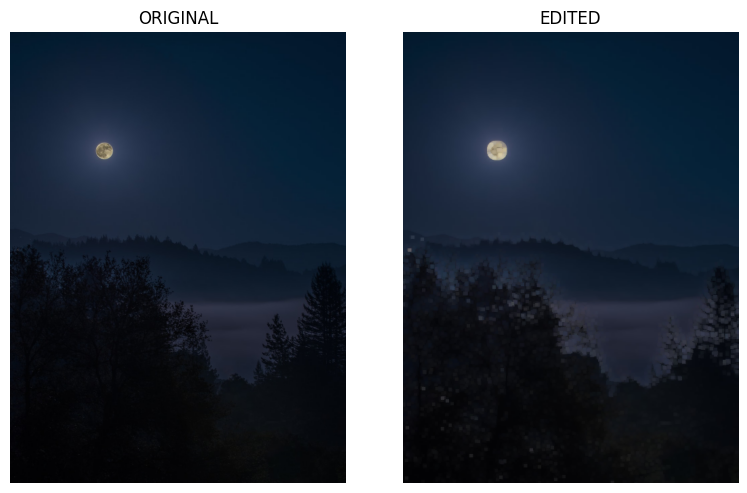

In [12]:
# convert numpy-based image to torch.Tensor type
# from_numpy(img) => convert numpy array to pytorch tensor
# permute(2,0,1) => rearranges the dimensions of tensor from HWC (Height X Width X Channels) to CHW (Channels X Height X Width)
# float() => converts the data of the tensor to float type
img_torch = from_numpy(img).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
# MaxPool2d => 2D max pooling layer in PyTorch, there is a downsampling operation here.
          # => the function is to reduce the spatial dimensions of the input volume
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
# permute (1,2,0) => to reverts the dimensions back to HWC
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img, img_torch_edited])

In [ ]:
# QUESTIONS
# TODO: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?

[ ANSWER HERE ]

**Scikit-Image** use 'block_reduce()' function to get the max value of pixels for each blocks divided in image. While **Pytorch** offer the MaxPool2d module to automatically find the highest value of pixels with kernel_size and the stride, which is more effective for deep learning tasks.




### Min Pooling and Average Pooling

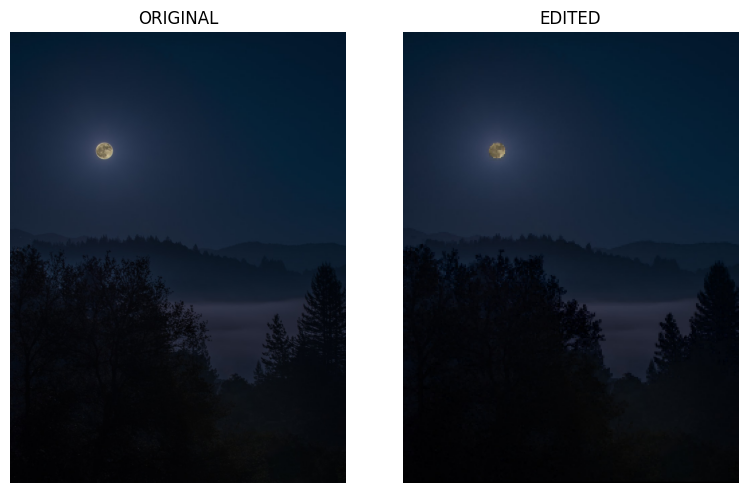

In [13]:
img_edited_min = block_reduce(img, block_size=BLOCK_SIZE, func=np.min) # TODO: Recall the block_reduce(), but with func=np.min
plot(imgs=[img, img_edited_min])

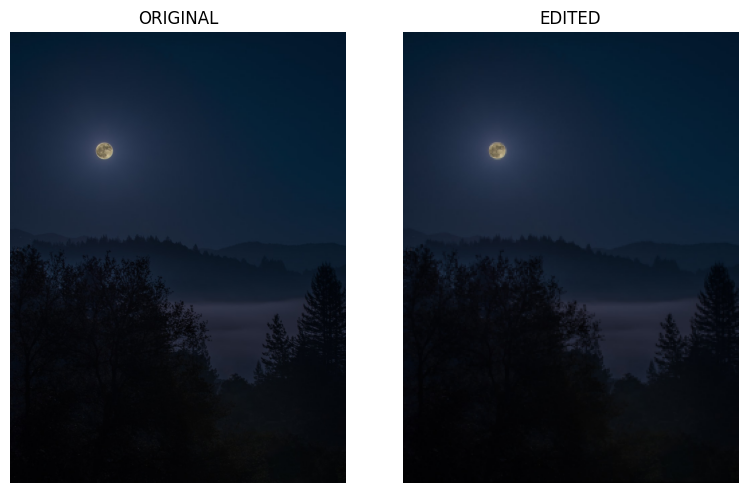

In [14]:
img_edited_avg = block_reduce(img, block_size=BLOCK_SIZE, func=np.mean).astype(int) # TODO: Recall the block_reduce().astype(int), but with func=np.mean
plot(imgs=[img, img_edited_avg])

In [15]:
# QUESTIONS
# TODO: What is the difference between Min Pooling and Average Pooling operations?
# If you cannot see the difference, try with another image or change the BLOCK_SIZE.

[ ANSWER HERE ]

**Scikit-Image** with Min Pooling, focuse on the minimum value of pixels in each block, which the value will be represent the dark color. That's why the result of Min Pooling present more dark / low quality images. While, the **Scikit-Image** with Avg Pooling provides a smoother representation and consider both dark and light features equally.

### CLAHE
Now imagine you have a better approach to compete Apple's Photonic Engine and Samsung's Adaptive Tetra-squared Pixel technologies using **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. How's the result?

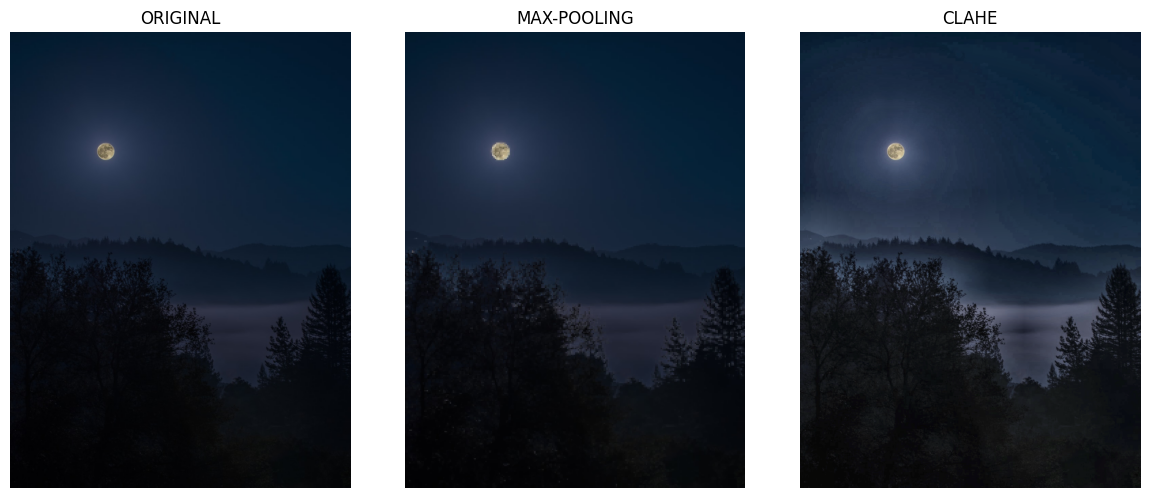

In [18]:
img_clahe  = apply_clahe_rgb(img) # TODO: Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
plot(imgs=[img, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [ ]:
# QUESTIONS
# TODO: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?

[ ANSWER HERE ]

MaxPooling manage the pixels by finding the highest pixels from block. It means that the block/component will be more bright, even it has bright enough or not (actually this is just help the dark area to be more clear). While **CLAHE** is like fine-tuning the contrast of different parts of an image, **so if one component/blocks is very dark, the CLAHE will brigthen it, and if another is very bright, the CLAHE will darken it a bit.**



In [19]:
FILE_NAME = 'photo1_clahe_version.png'# TODO: Give any file name to your new CLAHE-enhanced photo, ends with .png extension
imsave(fname=FILE_NAME, arr=img_clahe)

### Scoring
Total `#TODO` = 12
<br>Checklist:

- [ ] Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB
- [ ] Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
- [ ] Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY
- [ ] Plot the histogram from the original image
- [ ] Plot the histogram from the grayscaled image
- [ ] QUESTION: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?
- [ ] Recall the block_reduce(), but with func=np.min
- [ ] Recall the block_reduce().astype(int), but with func=np.mean
- [ ] What is the difference between Min Pooling and Average Pooling operations?
- [ ] Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
- [ ] QUESTION: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?
- [ ] Give any file name to your new CLAHE-enhanced photo, ends with .png extension

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2023 Startup Campus, Indonesia
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.